## Тинькофф. Курс Анализ данных в индустрии (весна 2021)

### АБ-тесты. Часть 2. Решение задач

In [46]:
#Здесь будем импортировать библиотеки
import numpy as np
from scipy import stats
import pandas as pd
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Задача 1:

У вас есть сайт, на котором посетители могут совершать покупки.

Обычная конверсия в покупку на потоке клиентов составляет 11%. Начиная с февраля конверсия уменьшилась до 9%, причем вывод сделан по 1400 наблюдениям.

__Найдите p-value, характеризующее статзначимость гипотезы о том, что с февраля конверсия действительно упала.__\
(Подсказка: тут нет никакого А-Б теста, мы просто сравниваем новую ситуацию со старой)

In [1]:
mu0 = 0.11
mu1 = 0.09
n = 1400

В данной задаче распределение Бернулли.

$H_0: \mu_1 = \mu_0$\
$H_1: \mu_1 < \mu_0$ (Будем проверять одностороннуюю гипотезу).\
Используем $Z$-критерий для доли, посчитаем $Z$-стастику и оценим вероятность получить такое или более экстремальное значение статистики при верности нулевой гипотезы ($Z$-статистика имеет нормальное распределение).

In [4]:
z = (mu1 - mu0) / np.sqrt(mu0 * (1 - mu0) / n)
z

-2.391677773876565

In [19]:
p_val = stats.norm.cdf(z)
print('p-value leftside:', round(p_val, 4))

p-value leftside: 0.0084


In [12]:
p_val = 2*(1-stats.norm.cdf(abs(z)))
print('p-value two-sided:', round(p_val, 4))

p-value two-sided: 0.0168


### Задача 2.

У вас тот же сайт, на котором вы решили провести АБ-тест.

Взяли выборку, поделили примерно пополам. На тестовой группе предлагаем клиенту скидку в 20%. Гипотеза заключается в том, что скидка увеличивает конверсию в продажу.

Результаты получились следующими:
Контроль: из 16500 наблюдений 1599 покупок\
Тест: из 15903 наблюдений 1580 покупок

Мы уверены, что конверсия на тесте должна быть не хуже контроля и ожидаем уровень значимости alpha=0.05

__Статзначимый ли результат теста?__

__Ответ__:\
Здесь ничего особенного. Воспользуемся калькулятором по [ссылке](https://abtestguide.com/calc/). Выберем одностороннюю альтернативу.

Калькулятор показывает, что результат не является статистически значимым.\
$p-value = 0.2300$\
$Observed Power = 28.54%$

In [16]:
b1 = 1599
n1 = 16500
b2 = 1580
n2 = 15903
stats.binom_test(b2, n2, b1 / n1, alternative = 'greater')

0.1519966655880118

Биномиальный тест также показывает отсутствие статистически значимых результатов (здесь корректно применять биномиальный тест, потому что мы имеем дело с распределением Бернулли)

Посчитаем z-критерий для разницы 2-х долей.

In [20]:
p1 = b1 / n1
p2 = b2 / n2 
P = (b1 + b2) / (n1 + n2)
    
z = (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))
z

-0.7391350963987632

In [24]:
stats.norm.cdf(z)

0.22991248360663058

### Задача 3.

Тот же сайт, но теперь тестируем следующее:
 - В группе B (тест) предлагаем покупателям дополнительно добавить в корзину еще один товар по скидке.
 - контрольной группе А ничего не предлагаем.

Результаты теста лежат в приложенном файле *покупки.xlsx*

__Требуется определить, есть ли статзначимое различие в распределениях на тесте и контроле с уровнем значимости alpha=0.05__

In [27]:
data = pd.read_excel('purchases_ABtests.xlsx')
data.head()

,Группа,Значение
0,А,1499
1,А,1499
2,А,1099
3,А,1099
4,А,109


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
Группа      105 non-null object
Значение    105 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [37]:
# Буква названия группы тоже по-русски написана
data[data['Группа'] == 'А'].describe()

,Значение
count,49.000000
mean,891.244898
std,976.211353
min,19.000000
25%,109.000000
50%,299.000000
75%,1499.000000
max,2999.000000


In [38]:
# Здесь буква названия группы по-английски написана
data[data['Группа'] == 'B'].describe()

,Значение
count,56.000000
mean,881.178571
std,928.917437
min,1.000000
25%,109.000000
50%,299.000000
75%,1499.000000
max,3199.000000


Поскольку прямо в задание не говорится, что понимать под названием колонки "Значение", будем считать, что это сумма покупки

In [61]:
# Чтобы дальше не путаться, поменяем названия на английские
data.columns = ['group', 'purchase']
data['group'].replace(['А'], ['A'], inplace = True)

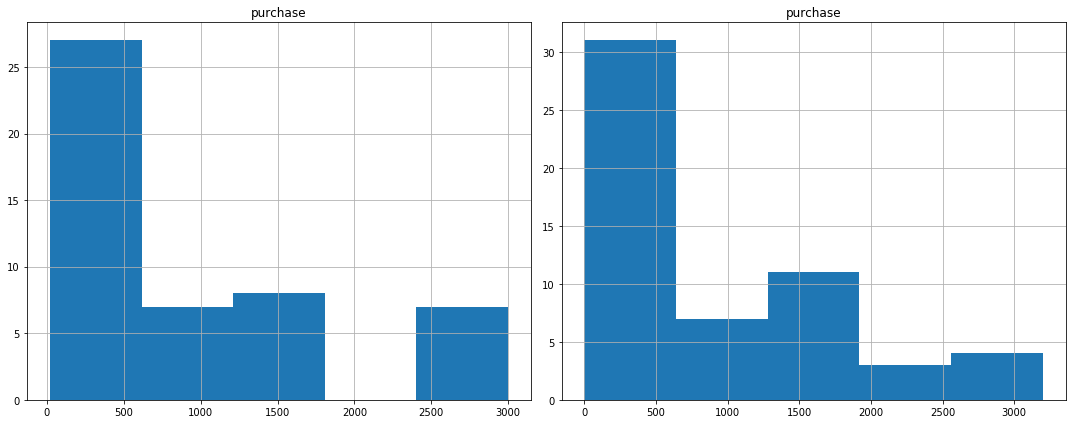

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
data[data.group == 'A'].hist(bins=5, ax = subplot(1,2,1))
data[data.group == 'B'].hist(bins=5, ax = subplot(1,2,2))
fig.tight_layout()

Распределения далеки от нормальных

Нулевая гипотеза: $H_0$ : $F_{X1} (x) = F_{X2} (x)$ ;\
Альтернатива: $H_1$ : $F_{X1} (x) = F_{X2} (x + \Delta)$ ; $\Delta \neq 0$;\
В задаче прямо не указывается, какую альтернативу проверять. Проверим двухстороннюю. И для сравнение проверим одностороннюю, что в группе B есть смещение.

In [86]:
f1 = data[data.group == 'A'].purchase.tolist()
f2 = data[data.group == 'B'].purchase.tolist()

In [95]:
stats.mannwhitneyu(f2, f1, alternative ='two-sided')

MannwhitneyuResult(statistic=1426.5, pvalue=0.7214922963378055)

In [98]:
stats.mannwhitneyu(f2, f1, alternative ='greater')

MannwhitneyuResult(statistic=1426.5, pvalue=0.36074614816890277)

Полученные результаты свидетельствуют о том, что результаты не являются статистически значимыми.